# Exploratory Data Analysis with Neptune


<a target="_blank" href="https://github.com/neptune-ai/examples/tree/main/use-cases/time-series-forecasting">
  <img alt="Open in GitHub" src="https://img.shields.io/badge/Open_in_GitHub-blue?logo=github&labelColor=black">
</a><a target="_blank" href="https://app.neptune.ai/o/common/org/project-time-series-forecasting/runs/details?viewId=standard-view&detailsTab=dashboard&dashboardId=EDA-986d253b-db7c-4809-9599-dfad99181767&shortId=TSF-439"> 
  <img alt="Explore in Neptune" src="https://neptune.ai/wp-content/uploads/2024/01/neptune-badge.svg">
</a>

## Introduction

When executing exploratory data analysis, you can use Neptune to organize, visualize and compare dataset statistics.

By the end of this guide, you will learn how to organize your run to track exploratory data analysis metadata, so that you can easily analyze the results.

## Before you start

This notebook example lets you try out Neptune anonymously, with zero setup.

* If you're running the notebook on your local machine, you need to have [Python](https://www.python.org/downloads/) and [pip](https://pypi.org/project/pip/) installed.
* If you want to see the example logged to your own workspace instead:
    * Create a Neptune account → [Take me to registration](https://neptune.ai/register)
    * Create a Neptune project that you will use for tracking metadata → [Tell me more about projects](https://docs.neptune.ai/administration/projects)

## Install Neptune and dependencies

In [ ]:
! pip install -U neptune matplotlib numpy "pandas<2.0" scikit-learn "seaborn==0.11.2"

## Import dependencies

In [ ]:
import matplotlib.pyplot as plt
import neptune
import seaborn as sns
from neptune.types import File
import sys
from pathlib import Path
import os
import pandas as pd

try:
    grandparent_dir = Path.absolute(Path(__file__)).parent.parent
    sys.path.append(os.path.join(os.getcwd(), Path.relative_to(grandparent_dir, os.getcwd())))

    DATA_PATH = os.path.join(os.getcwd(), Path.relative_to(grandparent_dir, os.getcwd()), "dataset")
except NameError:
    sys.path.append(os.path.dirname(os.getcwd()))
    DATA_PATH = "../dataset"

from utils import *

sns.set()
plt.rcParams["figure.figsize"] = 15, 8
plt.rcParams["image.cmap"] = "viridis"

## Start a run

To create a new run for tracking the metadata, we tell Neptune:
* **Who you are** - with your Neptune API token
* **Where to send the metadata** - to your Neptune project

For example, if your workspace name is `ml-team` and the project name is `time-series-forecasting`, the project argument is: `project="ml-team/time-series-forecasting"`.

To find your API token and project name, [log in to Neptune](https://app.neptune.ai/).
- In the top-right corner, click your avatar and select **Get your API token**.
- To find and copy your project name, navigate to the project, then click **Settings** → **Properties**.

### Haven't registered yet?

To log anonymously to a public project, replace the code below with the following:

```python
import neptune

run = neptune.init_run(project="common/project-time-series-forecasting", api_token=neptune.ANONYMOUS_API_TOKEN)
```

In [ ]:
run = neptune.init_run(
    project="common/project-time-series-forecasting",  # replace with your own
    tags=["eda", "walmart-sales"],
    name="EDA",
)

C:\Users\siddh\miniconda3\envs\py38\lib\site-packages\neptune\common\warnings.py:62: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  warnings.warn(


https://app.neptune.ai/common/project-time-series-forecasting/e/TSF-1093


You now have new run in Neptune! From here on, we'll use the `run` object to log metadata.

**To open the run in Neptune, click on the link that appeared in the cell output.**

There's not much to display yet, but keep the tab with the run open to see what happens next.

## Log dataset statistics & visualizations to Neptune

In [ ]:
# Load dataset
df = load_data(DATA_PATH, cache=True)

# Create data statistics
df_statistics = df.describe()

# Create data processing
total_no_days = (pd.to_datetime(df.Date.max()).date() - pd.to_datetime(df.Date.min()).date()).days
total_no_months = total_no_days * 0.032855
total_no_years = total_no_months * 0.0833334
abs_no_years = int(total_no_years)
sales_warm_vs_cold = (
    df[df.Temperature > 15]["Weekly_Sales"].sum() - df[df.Temperature < 15]["Weekly_Sales"].sum()
)

### Log dataset statistics

Neptune supports logging a variety of metadata.  
See what all you are log and display here: https://docs.neptune.ai/logging/what_you_can_log/

In [ ]:
stats_namespace = "data/statistics"
run[stats_namespace]["dataset_statistics"].upload(File.as_html(df_statistics))
run[stats_namespace]["total_no_days"] = total_no_days
run[stats_namespace]["total_no_years"] = total_no_years
run[stats_namespace]["abs_no_years"] = abs_no_years
run[stats_namespace]["diffSales_warm_vs_cold"] = "$ {:,}".format(round(sales_warm_vs_cold))

C:\Users\siddh\AppData\Local\Temp\ipykernel_11936\3451768978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


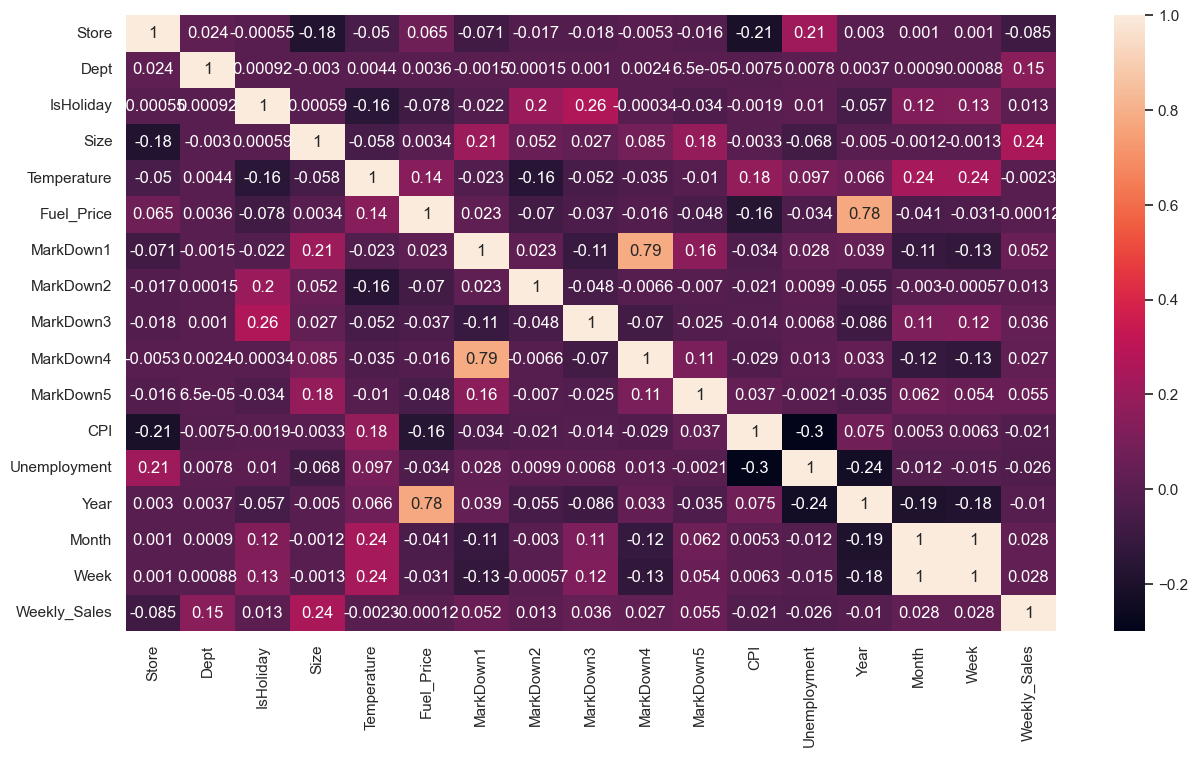

In [ ]:
# Create data visualizations
corr_matrix = df.corr()
plt.figure()
sns_corr_matrix = sns.heatmap(data=corr_matrix, annot=True)

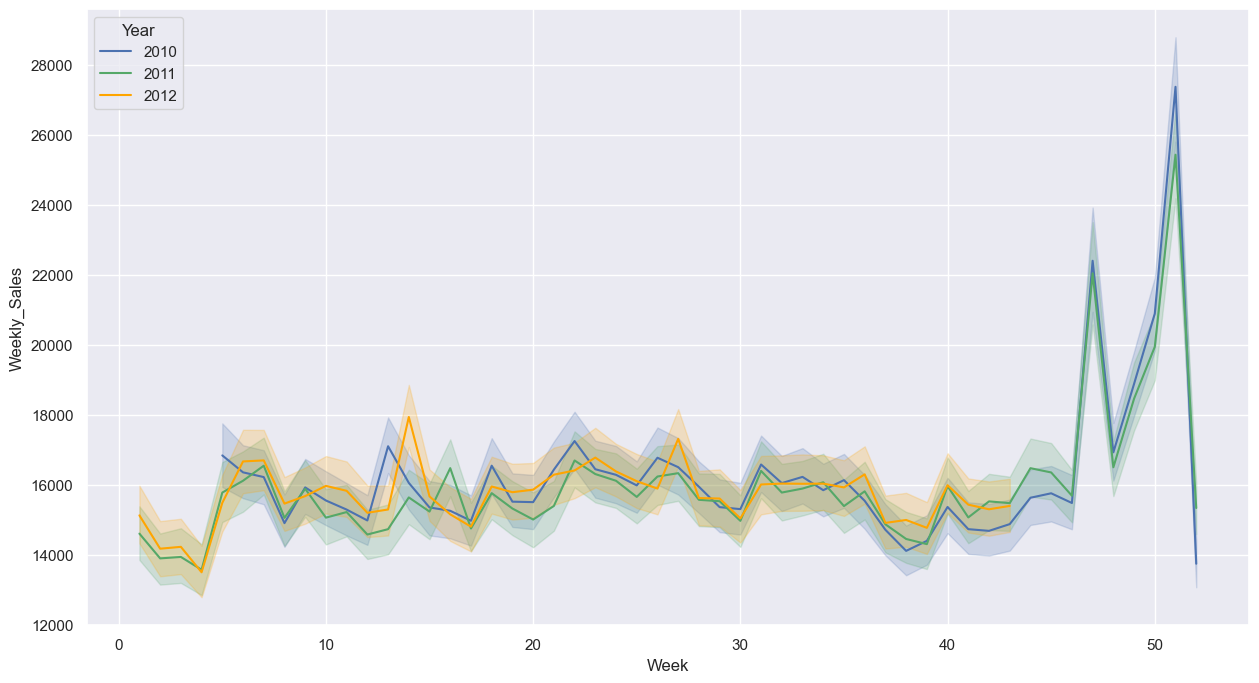

In [ ]:
plt.figure()
sales_vs_week = sns.lineplot(
    x="Week", y="Weekly_Sales", hue="Year", data=df, palette=["b", "g", "orange"]
)

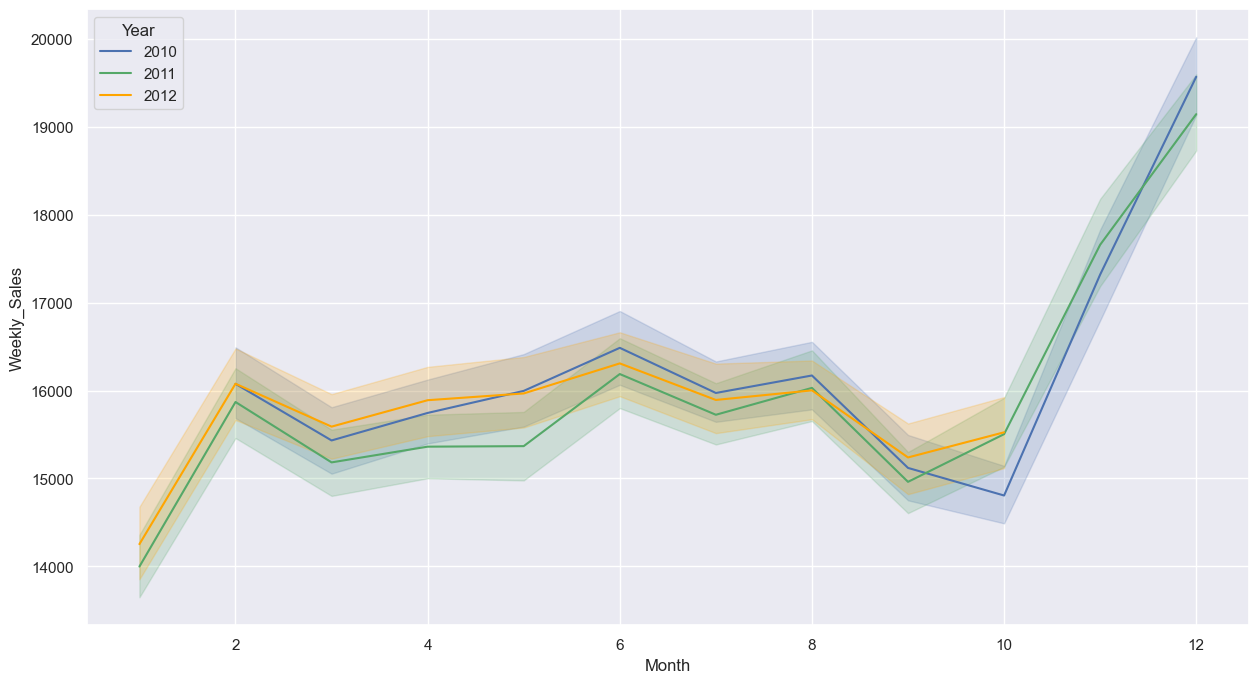

In [ ]:
plt.figure()
sales_vs_month = sns.lineplot(
    x="Month", y="Weekly_Sales", hue="Year", data=df, palette=["b", "g", "orange"]
)

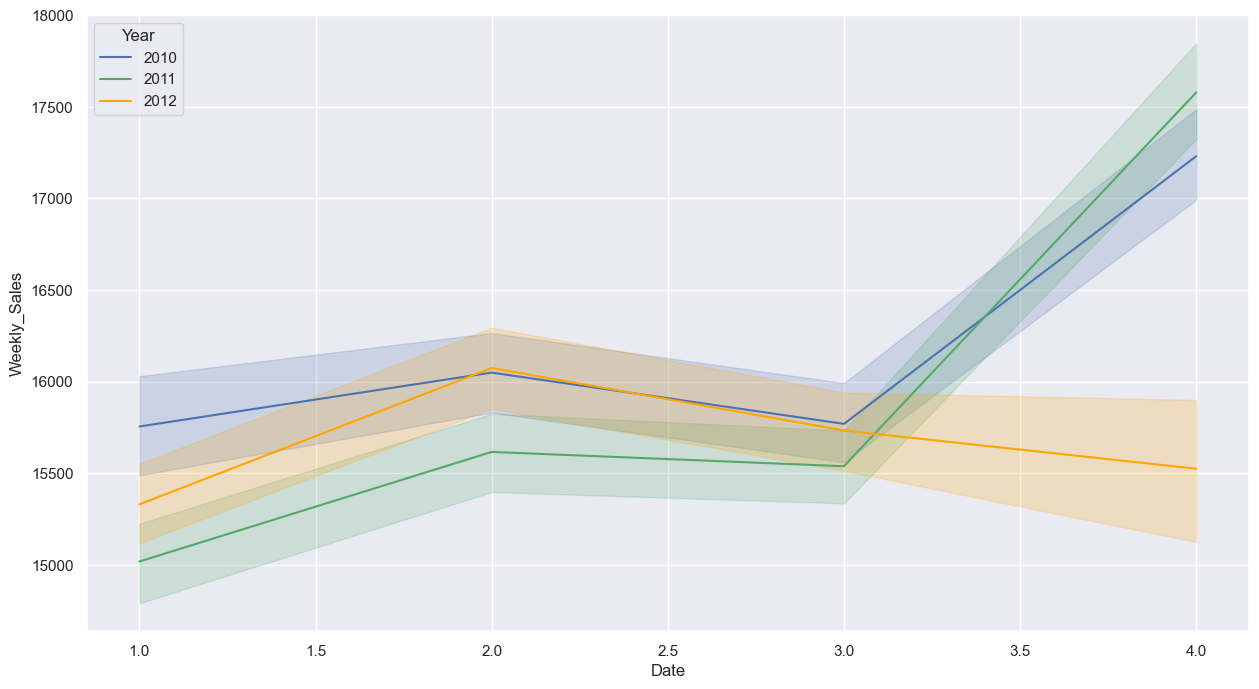

In [ ]:
plt.figure()
sales_vs_qt = sns.lineplot(
    x=df["Date"].dt.quarter,
    y="Weekly_Sales",
    hue="Year",
    data=df,
    palette=["b", "g", "orange"],
)

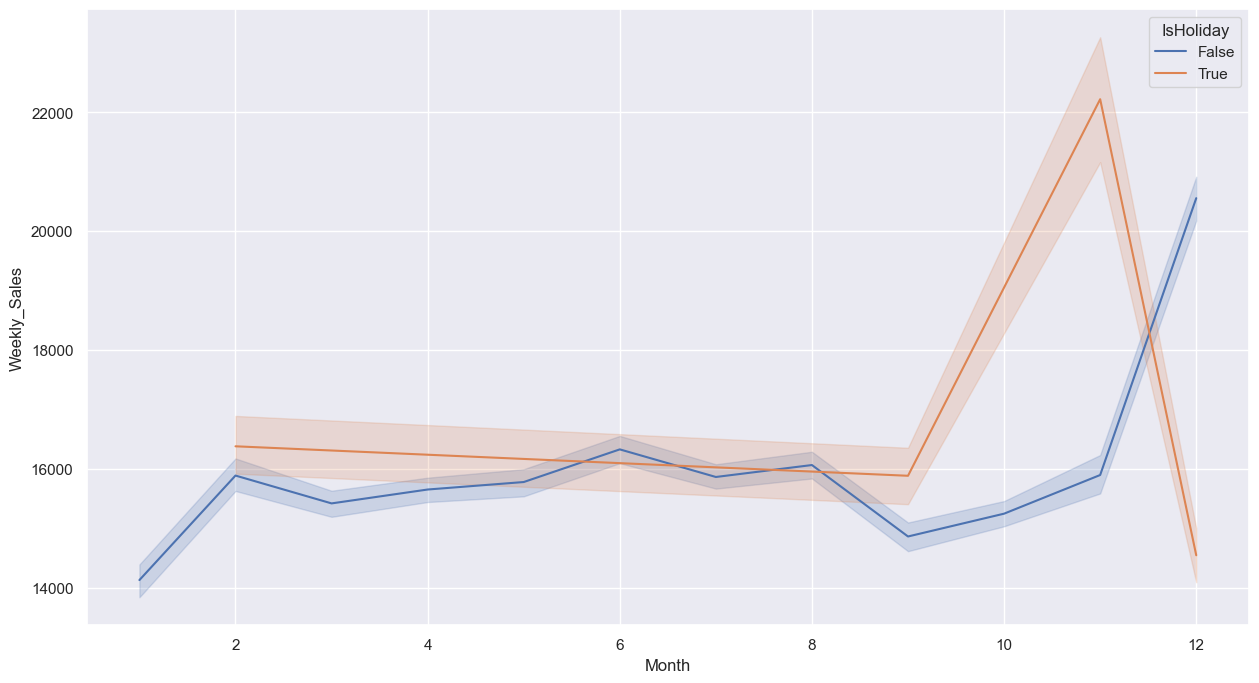

In [ ]:
plt.figure()
sales_vs_isholiday = sns.lineplot(x="Month", y="Weekly_Sales", hue="IsHoliday", data=df)

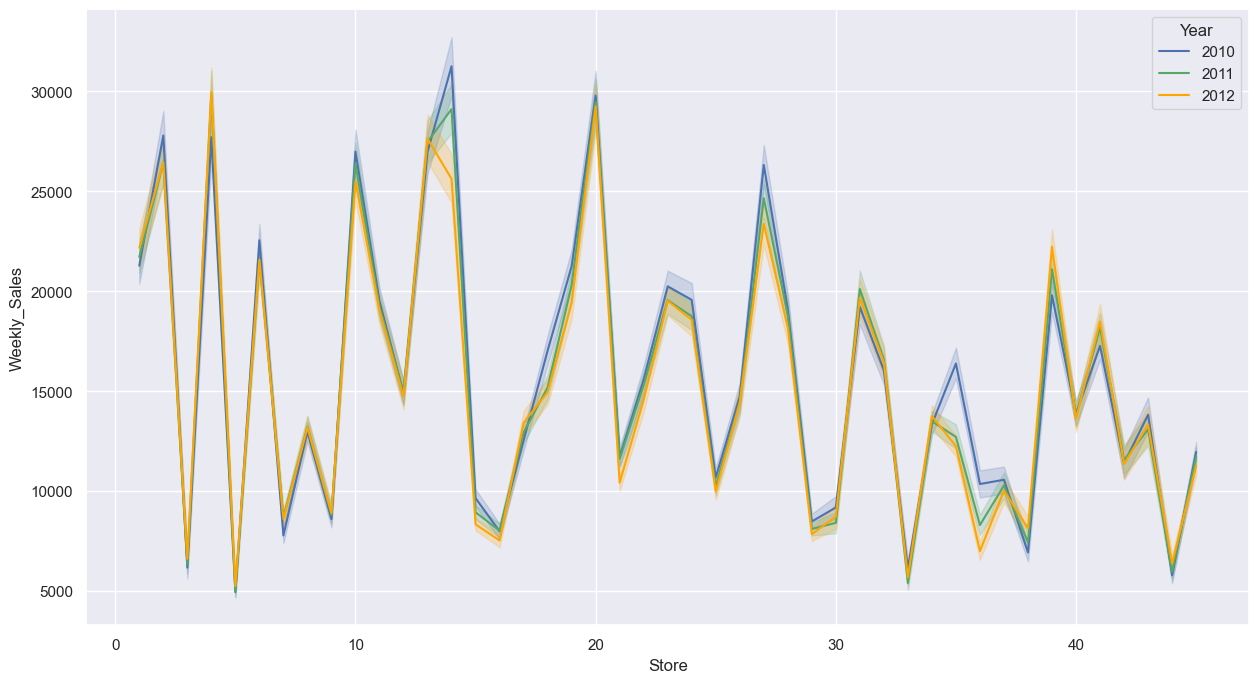

In [ ]:
plt.figure()
sales_vs_store = sns.lineplot(
    x="Store", y="Weekly_Sales", hue="Year", data=df, palette=["b", "g", "orange"]
)

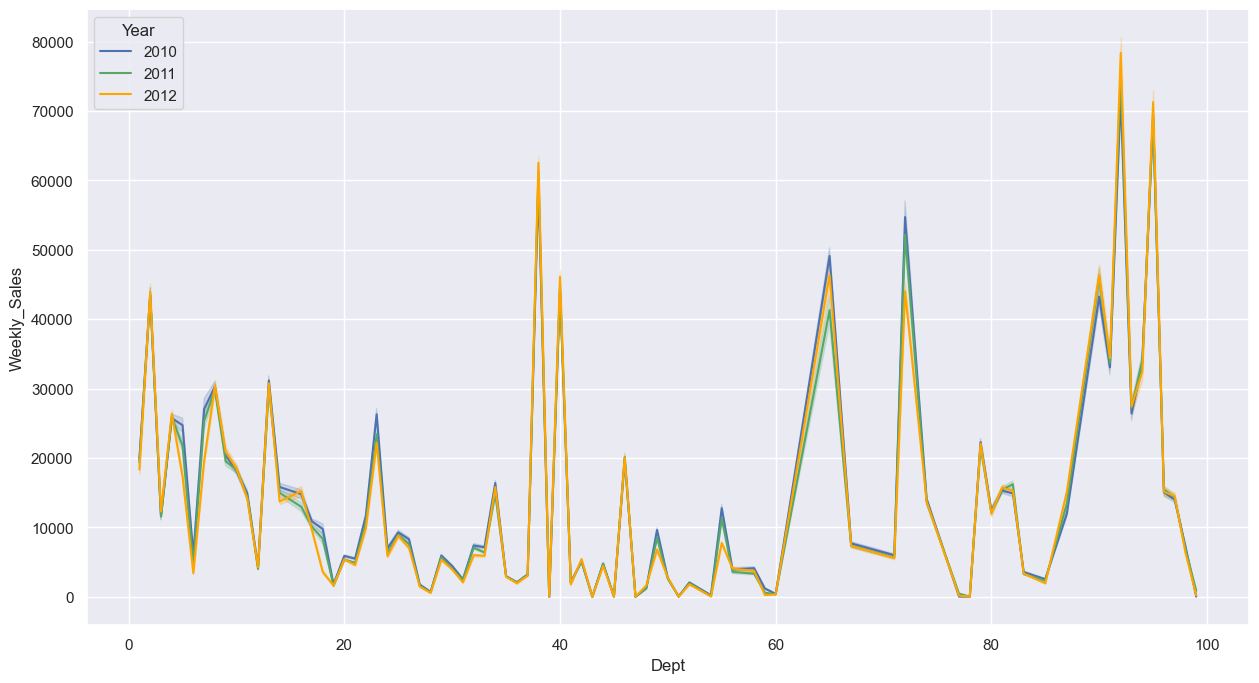

In [ ]:
plt.figure()
sales_vs_dept = sns.lineplot(
    x="Dept", y="Weekly_Sales", hue="Year", data=df, palette=["b", "g", "orange"]
)

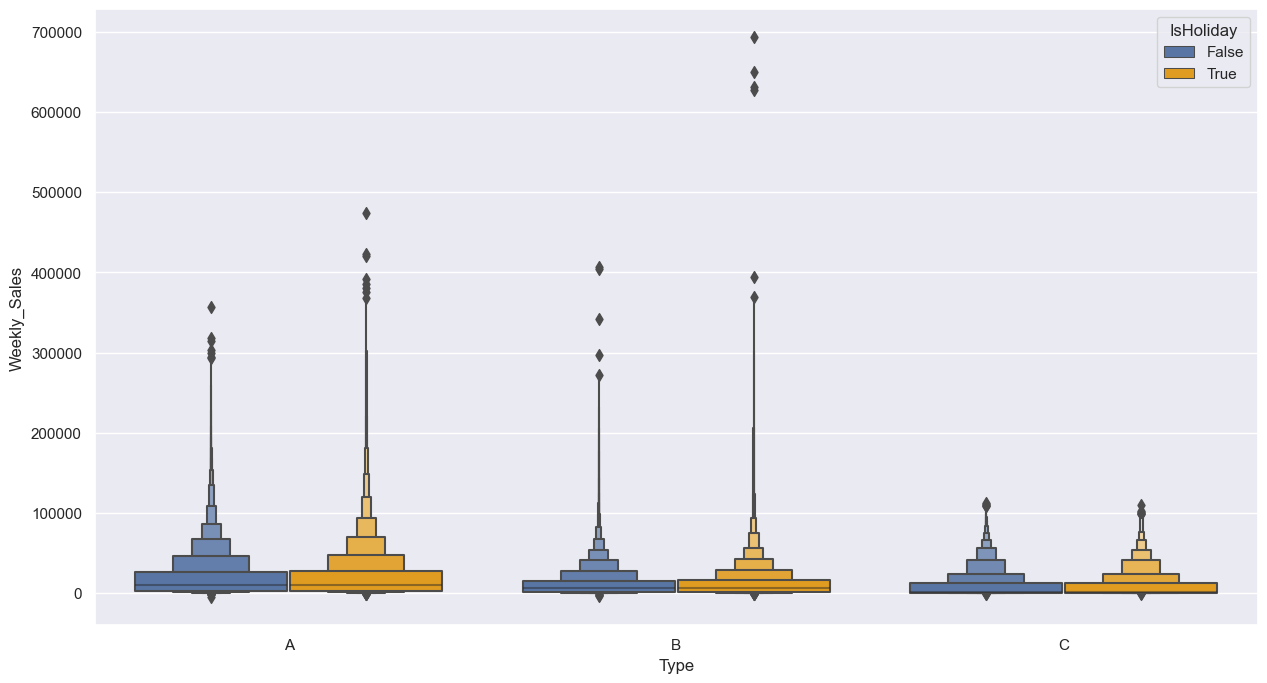

In [ ]:
plt.figure()
sales_vs_storeType = sns.boxenplot(
    x="Type", y="Weekly_Sales", data=df, hue="IsHoliday", palette=["b", "orange"]
)

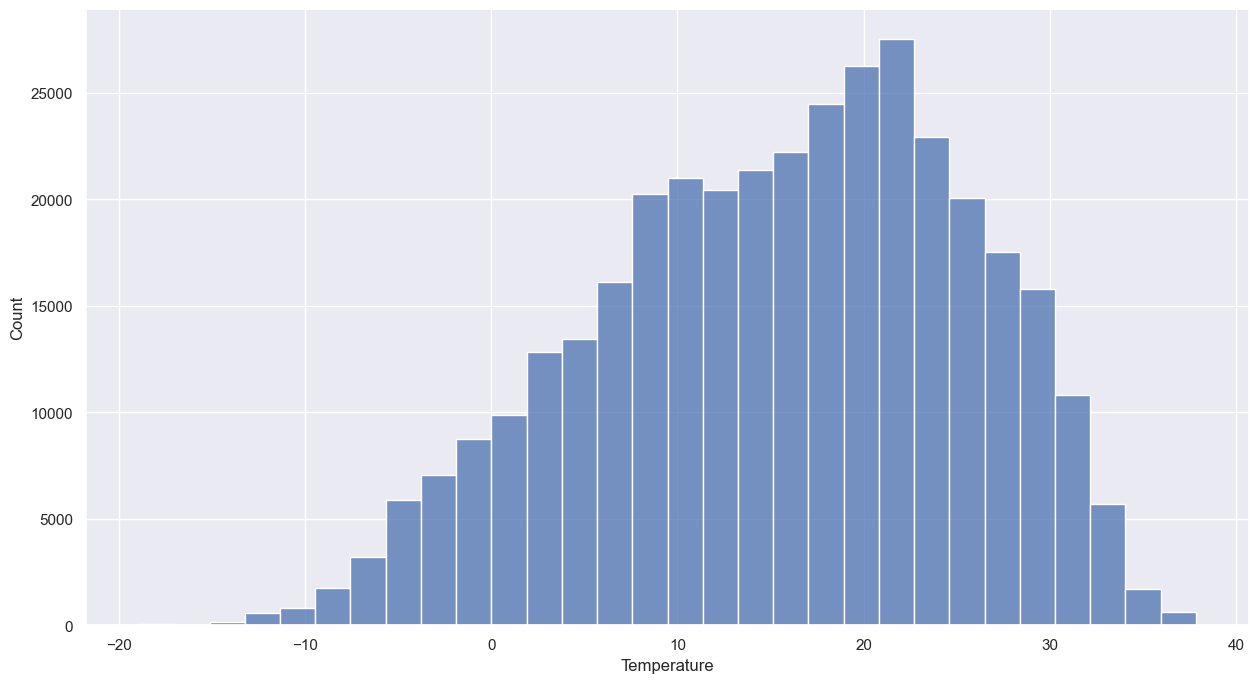

In [ ]:
plt.figure()
sales_vs_temp = sns.histplot(data=df.groupby("Weekly_Sales")["Temperature"].mean(), bins=30)

Working on column: Weekly_Sales


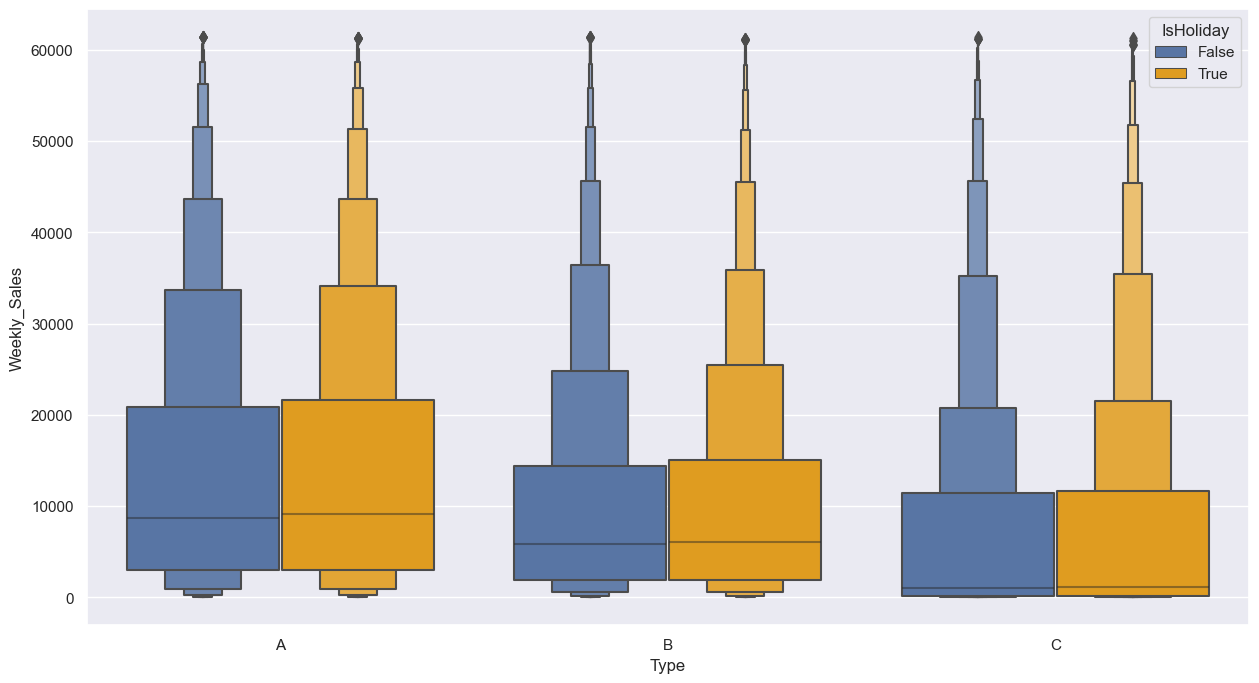

In [ ]:
df_normalized = normalize_data(df, "Weekly_Sales")
plt.figure()
sales_vs_storeType_normalized = sns.boxenplot(
    x="Type",
    y="Weekly_Sales",
    data=df_normalized,
    hue="IsHoliday",
    palette=["b", "orange"],
)

### Log dataset visualizations

Learn more about logging seaborn visualizations here: https://docs.neptune.ai/logging/images/#__tabbed_1_2

In [ ]:
viz_namespace = "data/visualizations"
run[viz_namespace]["corr_matrix"].upload(File.as_image(sns_corr_matrix.figure))
run[viz_namespace]["/sales_vs_week"].upload(File.as_image(sales_vs_week.figure))
run[viz_namespace]["/sales_vs_month"].upload(File.as_image(sales_vs_month.figure))
run[viz_namespace]["/sales_vs_quarter"].upload(File.as_image(sales_vs_qt.figure))
run[viz_namespace]["/sales_vs_store"].upload(File.as_image(sales_vs_store.figure))
run[viz_namespace]["/sales_vs_dept"].upload(File.as_image(sales_vs_dept.figure))
run[viz_namespace]["/sales_vs_IsHoliday"].upload(File.as_image(sales_vs_isholiday.figure))
run[viz_namespace]["sales_vs_temperature"].upload(File.as_image(sales_vs_temp.figure))
run[viz_namespace]["sales_vs_storeType"].upload(File.as_image(sales_vs_storeType.figure))
run[viz_namespace]["sales_vs_storeType_normalized"].upload(
    File.as_image(sales_vs_storeType_normalized.figure)
)

## Stop logging

Once you are done logging, stop tracking the run.

In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/common/project-time-series-forecasting/e/TSF-1093/metadata
